In [1]:
#!pip install pandas_ta

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas_ta
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
#Endre i jupyter!!!!!!!!!!!

#url = "TSLA.csv"
url = "https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1277769600&period2=1634774400&interval=1d&events=history&includeAdjustedClose=true"
df = pd.read_csv(url)


In [4]:
#Using date as index
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df = df[['Open', 'High','Low','Volume','Close']]

In [5]:
#Checking data
df.head(10)

,Open,High,Low,Volume,Close
Date,,,,,
2010-06-29,3.800,5.000,3.508,93831500,4.778
2010-06-30,5.158,6.084,4.660,85935500,4.766
2010-07-01,5.000,5.184,4.054,41094000,4.392
2010-07-02,4.600,4.620,3.742,25699000,3.840
2010-07-06,4.000,4.000,3.166,34334500,3.222
2010-07-07,3.280,3.326,2.996,34608500,3.160
2010-07-08,3.228,3.504,3.114,38557000,3.492
2010-07-09,3.516,3.580,3.310,20253000,3.480
2010-07-12,3.590,3.614,3.400,11012500,3.410


<AxesSubplot:xlabel='Date'>

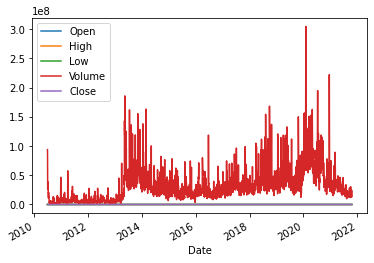

In [6]:
#Checking data plotted
df.plot()

In [7]:
#Calculating Exponential Moving Average based on the last 10 days. Nice feature in stock prediction
df.ta.ema(close='Close', lenght=10, append=True)


Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2021-10-14    795.668213
2021-10-15    804.279453
2021-10-18    816.248640
2021-10-19    824.979800
2021-10-20    832.401653
Name: EMA_10, Length: 2849, dtype: float64

In [8]:
df.head(20)

,Open,High,Low,Volume,Close,EMA_10
Date,,,,,,
2010-06-29,3.800,5.000,3.508,93831500,4.778,NaN
2010-06-30,5.158,6.084,4.660,85935500,4.766,NaN
2010-07-01,5.000,5.184,4.054,41094000,4.392,NaN
2010-07-02,4.600,4.620,3.742,25699000,3.840,NaN
2010-07-06,4.000,4.000,3.166,34334500,3.222,NaN
2010-07-07,3.280,3.326,2.996,34608500,3.160,NaN
2010-07-08,3.228,3.504,3.114,38557000,3.492,NaN
2010-07-09,3.516,3.580,3.310,20253000,3.480,NaN
2010-07-12,3.590,3.614,3.400,11012500,3.410,NaN


In [9]:
#Removing NAN values because of our data, because the average could not be calculated without 10 days of previous data
df.dropna(inplace = True);

In [10]:
#Check if it worked
df.head()

,Open,High,Low,Volume,Close,EMA_10
Date,,,,,,
2010-07-13,3.478,3.728,3.380,13400500,3.628,3.816800
2010-07-14,3.588,4.030,3.552,20976000,3.968,3.844291
2010-07-15,3.988,4.300,3.800,18699000,3.978,3.868602
2010-07-16,4.140,4.260,4.010,13106500,4.128,3.915765
2010-07-19,4.274,4.450,4.184,12432500,4.382,4.000535


In [11]:
#defining x and y for splitting, training and testing
X = df[['EMA_10']]
y = df[['Close']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

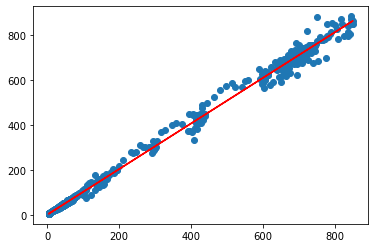

MSE = 116.9009547065091


In [13]:
#Copied from lab4

plt.scatter(X_train, y_train)             #Plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')    #Plot red line with prediction
plt.show()                                #Show the plot
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE

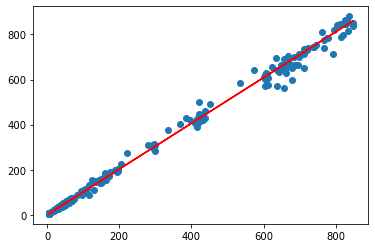

MSE = 103.41663042596572


In [14]:
#Copied from lab4

Y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [15]:

#Input dato
dato ='2021-01-04'

try:
    #Finding index for chosen date
    i = df.index.get_loc(dato)
    
    #Finding day before to predict closing price on chosen date
    dfDato = df.iloc[[i-1]]
    emaDato = dfDato[['EMA_10']]

    actualPrice = df.iloc[i]['Close']

        
except:
    #Could not see from the assignment if we should predict into the future, as we can not check the actual price in the future.
    print('ERROR: This could be a weekend or future') 

prediction = linear_regressor.predict(emaDato)
predPrice = prediction[0][0]

percentage = (predPrice/actualPrice)*100

#Output prediction
print('Predicted price on date ' + str(dato) + ": " + str(predPrice))
print('Actual price on date '+ str(dato) + ": " + str(actualPrice))
print('Percentage of actual price: ' + str(percentage))

Predicted price on date 2021-01-04: 676.789882997243
Actual price on date 2021-01-04: 729.77002
Percentage of actual price: 92.74015983792304


In [16]:
#Predicting the future. How we would have done it. (Written in Norwegian before changing solution)

#Input en dag.
#Løkke per dag fra siste dag i datasett fram til input

    #Kjør prediction basert på siste EMA
#    prediction = linear_regressor.predict(df[['EMA_10']].tail(1))
#    print(prediction)

    #Legg til prediction på bunnen av dataframe i "Close" (Bare siste 10dager?)
#    df['Close'].last('14D') #14 dager er 10 rader pga helg.

    #Regne ut nytt EMA

#Printe siste prediction